#### Linear regression

In [2]:
# Import library and read data with pandas 
import pandas as pd
data = pd.read_csv("Course_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample                   106 non-null    object 
 1   date                     106 non-null    object 
 2   estuary                  106 non-null    object 
 3   area                     106 non-null    object 
 4   station                  106 non-null    object 
 5   layer_depth              106 non-null    object 
 6   season                   106 non-null    object 
 7   chlorophy_microg_l       106 non-null    float64
 8   cond_microsiemens_cm     106 non-null    float64
 9   depth_m                  106 non-null    float64
 10  do_percent_sat           106 non-null    float64
 11  do_mg_l                  106 non-null    float64
 12  sal_psu                  106 non-null    float64
 13  sp_cond_microsiemens_cm  106 non-null    float64
 14  turbidity_fnu            1

**Regression values for Salinity vs Temperature**

r-squared: 0.177
p_value: 6.879907520531154e-06
slope:: -0.028
intercept: 27.252


**Regression values for DIC vs Salinity**

r-squared: 0.327
p_value: 1.51441040237653e-10
slope:: -0.016
intercept: 60.804


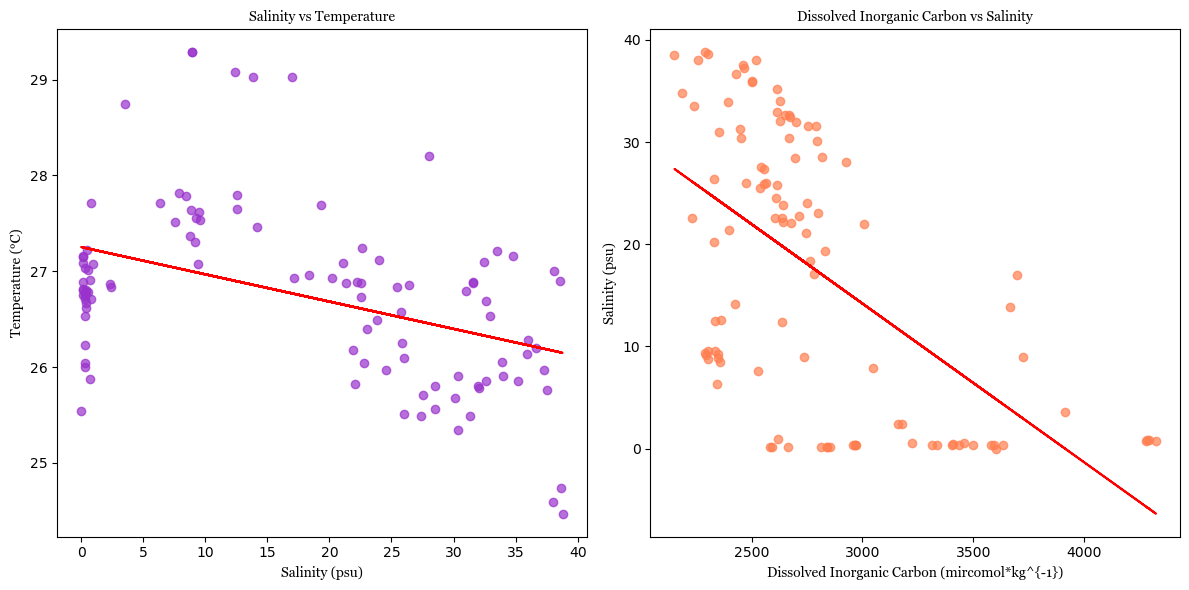

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from scipy import stats

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

########## SALINITY VS TEMPERATURE ##########  
x = data['sal_psu']
y = data['temp_c']

# Scatterplot Salinity vs Temperature
axes[0].scatter(x, y, color='darkorchid', alpha=0.7)
axes[0].set_title('Salinity vs Temperature', font="Georgia")
axes[0].set_xlabel('Salinity (psu)', font="Georgia")
axes[0].set_ylabel('Temperature (°C)', font="Georgia")
# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# Plot linear regression 
axes[0].plot(x, intercept + slope*x, 'r', label='fitted line')

display(Markdown('**Regression values for Salinity vs Temperature**'))
print(f"r-squared: {r_value**2:.3f}")
print("p_value:", p_value)
print(f"slope:: {slope:.3f}")
print(f"intercept: {intercept:.3f}")

########## DIC VS SALINITY ##########  
x1 = data['dic_micromol_kg']
y1 = data['sal_psu']

# Scatterplot Temperature vs DIC
axes[1].scatter(x1, y1, color='coral', alpha=0.7)
axes[1].set_title('Dissolved Inorganic Carbon vs Salinity', font="Georgia")
axes[1].set_xlabel('Dissolved Inorganic Carbon (mircomol*kg^{-1})', font="Georgia")
axes[1].set_ylabel('Salinity (psu)', font="Georgia")
# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x1, y1)
# Plot linear regression 
axes[1].plot(x1, intercept + slope*x1, 'r', label='fitted line')

display(Markdown('**Regression values for DIC vs Salinity**'))
print(f"r-squared: {r_value**2:.3f}")
print("p_value:", p_value)
print(f"slope:: {slope:.3f}")
print(f"intercept: {intercept:.3f}")


plt.tight_layout()
plt.show()

### Ordinary Least Squares (OLS) regression

#### SALINITY VS TEMPERATURE

In [ ]:
import statsmodels.api as sm
import numpy as np

# 1.Define the independent and dependent variables.
# They were already define.

# Add a constant to include the intercept in the model
# This step is necessary; otherwise, the regression will be forced through the origin (intercept = 0)
x = sm.add_constant(x)

# Fit the Ordinary Least Squares (OLS) linear regression model
model = sm.OLS(y, x).fit()

# Display the model summary for Salinity vs Temperature
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 temp_c   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     22.44
Date:                Sat, 23 Aug 2025   Prob (F-statistic):           6.88e-06
Time:                        17:16:55   Log-Likelihood:                -130.39
No. Observations:                 106   AIC:                             264.8
Df Residuals:                     104   BIC:                             270.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.2520      0.132    206.412      0.0

In [89]:
print("\n=== MODEL INTERPRETATION FOR SALINITY VS TEMPERATURE===\n")

# R-squared and fit quality
r2 = model.rsquared
fit_quality = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model."
)
print(f"R² = {r2:.3f}\n{fit_quality}")

# Coefficients and p-values
results = model.summary2().tables[1]
slope_var = results.index.drop('const')[0]  # Assuming one predictor

print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.7f} → {significance}")

# Slope interpretation
slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.7f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")

# Standard Error
print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")


=== MODEL INTERPRETATION FOR SALINITY VS TEMPERATURE===

R² = 0.177
❌ Weak model fit: Explains little variance. Review your model.

Coefficients:
- const: Coef = 27.2520, p = 0.0000000 → ✔️ Significant (p < 0.05)
- sal_psu: Coef = -0.0285, p = 0.0000069 → ✔️ Significant (p < 0.05)

Slope (sal_psu): -0.0285, p = 0.0000069 → ✔️ Significant

Standard Error of the model: 0.8359


#### DIC VS SALINITY

In [93]:
x1 = sm.add_constant(x1)

# OSL
model1 = sm.OLS(y1, x1).fit()

# Display the model summary for Salinity vs Temperature
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                sal_psu   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     50.56
Date:                Sat, 23 Aug 2025   Prob (F-statistic):           1.51e-10
Time:                        18:33:04   Log-Likelihood:                -405.41
No. Observations:                 106   AIC:                             814.8
Df Residuals:                     104   BIC:                             820.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              60.8044      6.210     

In [94]:
print("\n=== MODEL INTERPRETATION FOR DIC VS SALINITY===\n")

# R-squared and fit quality
r2 = model1.rsquared
fit_quality1 = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model."
)
print(f"R² = {r2:.3f}\n{fit_quality1}")

# Coefficients and p-values
results = model1.summary2().tables[1]
slope_var = results.index.drop('const')[0]  # Assuming one predictor

print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.7f} → {significance}")

# Slope interpretation
slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.7f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")

# Standard Error
print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")


=== MODEL INTERPRETATION FOR DIC VS SALINITY===

R² = 0.327
❌ Weak model fit: Explains little variance. Review your model.

Coefficients:
- const: Coef = 60.8044, p = 0.0000000 → ✔️ Significant (p < 0.05)
- dic_micromol_kg: Coef = -0.0155, p = 0.0000000 → ✔️ Significant (p < 0.05)

Slope (dic_micromol_kg): -0.0155, p = 0.0000000 → ✔️ Significant

Standard Error of the model: 11.1923
